#Travelling Salesman Problem Using Hill Climbing


Run 1:
Path: [3, 6, 0, 4, 5, 2, 9, 1, 8, 7]
Total Distance: 3441
Time Taken: 0.0024 seconds
Convergence Iterations: 7

Run 2:
Path: [4, 8, 5, 0, 1, 9, 7, 6, 2, 3]
Total Distance: 2786
Time Taken: 0.0012 seconds
Convergence Iterations: 3

Run 3:
Path: [8, 2, 0, 3, 9, 1, 7, 4, 6, 5]
Total Distance: 3077
Time Taken: 0.0016 seconds
Convergence Iterations: 4

Run 4:
Path: [4, 5, 3, 1, 9, 6, 2, 7, 0, 8]
Total Distance: 3572
Time Taken: 0.0096 seconds
Convergence Iterations: 4

Run 5:
Path: [9, 6, 4, 3, 1, 2, 7, 8, 0, 5]
Total Distance: 2864
Time Taken: 0.0015 seconds
Convergence Iterations: 4


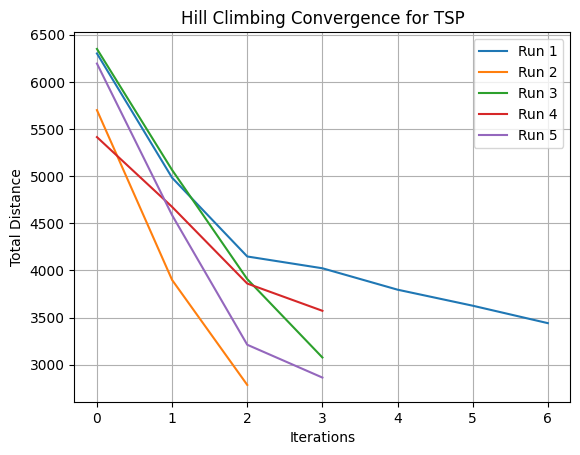


Time List (in seconds): [0.0024, 0.0012, 0.0016, 0.0096, 0.0015]
Average Time: 0.0033 seconds

Best Path Among All Runs:
Path: [4, 8, 5, 0, 1, 9, 7, 6, 2, 3]
Total Distance: 2786


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

def dist_cal(dist_matrix, soln):
    dist = 0
    for i in range(len(soln)):
        dist += dist_matrix[soln[i]][soln[(i + 1) % len(soln)]]
    return dist

def get_neighbors(sol):
    neighbors = []
    for i in range(len(sol)):
        for j in range(i + 1, len(sol)):
            neighbor = sol.copy()
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighbors.append(neighbor)
    return neighbors

def hill_climb(dist_matrix, max_iter=1000):
    current_solution = list(range(len(dist_matrix)))
    random.shuffle(current_solution)
    current_cost = dist_cal(dist_matrix, current_solution)
    convergence = [current_cost]

    for _ in range(max_iter):
        neighbors = get_neighbors(current_solution)
        next_solution = min(neighbors, key=lambda sol: dist_cal(dist_matrix, sol))
        next_cost = dist_cal(dist_matrix, next_solution)

        if next_cost < current_cost:
            current_solution, current_cost = next_solution, next_cost
            convergence.append(current_cost)
        else:
            break

    return current_solution, current_cost, convergence

# Run multiple times to track time performance
time_list = []
results = []
best_cost = float('inf')
best_solution = None

for run in range(5):
    dist_matrix = np.random.randint(100, 1000, (10, 10))
    np.fill_diagonal(dist_matrix, 0)

    start_time = time.time()
    sol, cost, convergence = hill_climb(dist_matrix, max_iter=500)
    end_time = time.time()
    elapsed_time = end_time - start_time

    time_list.append(elapsed_time)
    results.append((sol, cost, convergence, elapsed_time))

    print(f"\nRun {run+1}:")
    print("Path:", sol)
    print("Total Distance:", cost)
    print("Time Taken:", round(elapsed_time, 4), "seconds")
    print("Convergence Iterations:", len(convergence))

    plt.plot(convergence, label=f'Run {run+1}')

    if cost < best_cost:
        best_cost = cost
        best_solution = sol

# Plot convergence
plt.title('Hill Climbing Convergence for TSP')
plt.xlabel('Iterations')
plt.ylabel('Total Distance')
plt.legend()
plt.grid(True)
plt.show()

# Print timing stats
average_time = sum(time_list) / len(time_list)
print("\nTime List (in seconds):", [round(t, 4) for t in time_list])
print("Average Time:", round(average_time, 4), "seconds")

# Print the best solution
print("\nBest Path Among All Runs:")
print("Path:", best_solution)
print("Total Distance:", best_cost)


# Simulated Annealing

Running 5 simulations...

--- Run 1 ---
Best Path: [5, 6, 3, 9, 8, 7, 2, 0, 1, 4]
Total Cost: 4182
Time Taken: 0.02 sec
Convergence at iteration: 148

--- Run 2 ---
Best Path: [0, 7, 8, 9, 3, 6, 1, 4, 5, 2]
Total Cost: 4252
Time Taken: 0.02 sec
Convergence at iteration: 185

--- Run 3 ---
Best Path: [2, 7, 8, 9, 3, 6, 5, 4, 1, 0]
Total Cost: 4182
Time Taken: 0.02 sec
Convergence at iteration: 252

--- Run 4 ---
Best Path: [2, 7, 8, 9, 3, 6, 5, 4, 1, 0]
Total Cost: 4182
Time Taken: 0.02 sec
Convergence at iteration: 218

--- Run 5 ---
Best Path: [8, 7, 0, 2, 5, 4, 1, 6, 3, 9]
Total Cost: 4252
Time Taken: 0.03 sec
Convergence at iteration: 151



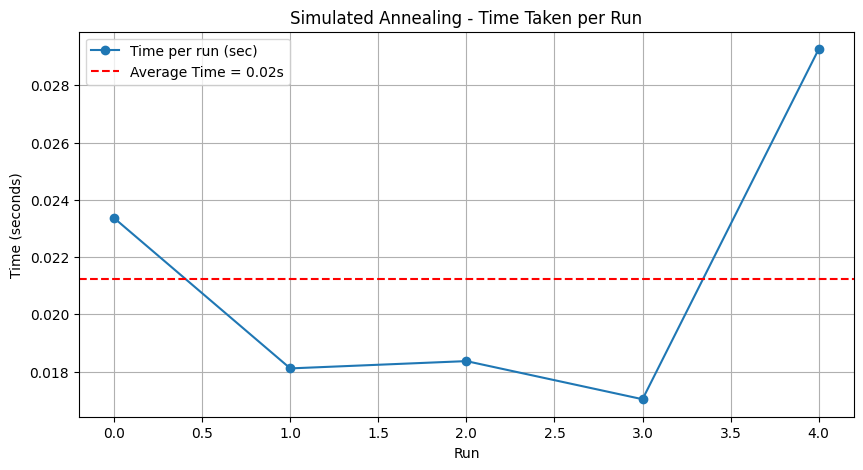

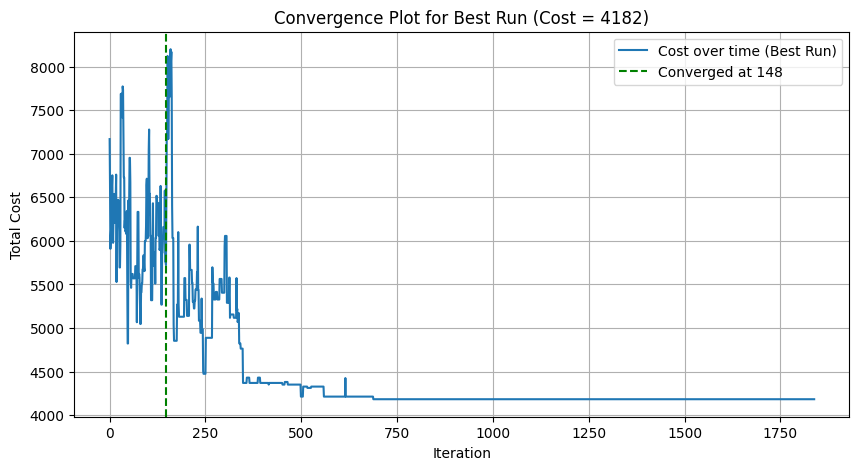

 Final Best Solution Across 5 Runs:
Best Path: [5, 6, 3, 9, 8, 7, 2, 0, 1, 4]
Total Cost: 4182
Time Taken: 0.02 sec
Converged at Iteration: 148


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time


# Distance Matrix for 10 cities
dist_matrix = [
    [0, 807, 465, 926, 996, 1159, 1167, 512, 373, 1063],
    [807, 0, 912, 329, 478, 912, 401, 746, 626, 963],
    [465, 912, 0, 661, 734, 755, 793, 434, 446, 692],
    [926, 329, 661, 0, 607, 486, 265, 846, 870, 409],
    [996, 478, 734, 607, 0, 283, 665, 946, 956, 850],
    [1159, 912, 755, 486, 283, 0, 357, 817, 976, 736],
    [1167, 401, 793, 265, 665, 357, 0, 673, 855, 669],
    [512, 746, 434, 846, 946, 817, 673, 0, 282, 589],
    [373, 626, 446, 870, 956, 976, 855, 282, 0, 402],
    [1063, 963, 692, 409, 850, 736, 669, 589, 402, 0]
]


def dist_cal(dist_matrix, soln):
    dist = 0
    for i in range(len(soln)):
        if i + 1 < len(soln):
            dist += dist_matrix[soln[i]][soln[i + 1]]
        else:
            dist += dist_matrix[soln[i]][soln[0]]
    return dist

def generate_neighbor(soln):
    new_soln = soln[:]
    i, j = random.sample(range(len(soln)), 2)
    new_soln[i], new_soln[j] = new_soln[j], new_soln[i]
    return new_soln

# Simulated Annealing Function
def simulated_annealing(dist_matrix, max_time=600, patience=100):
    start_time = time.time()

    cities = list(range(len(dist_matrix)))
    current_solution = random.sample(cities, len(cities))
    current_cost = dist_cal(dist_matrix, current_solution)

    temp = 1000
    cooling_rate = 0.995

    best_solution = current_solution
    best_cost = current_cost

    cost_over_time = [current_cost]
    no_improve_counter = 0
    convergence_point = None

    while temp > 0.1:
        elapsed_time = time.time() - start_time
        if elapsed_time > max_time:
            break

        neighbor_solution = generate_neighbor(current_solution)
        neighbor_cost = dist_cal(dist_matrix, neighbor_solution)

        if neighbor_cost < current_cost or random.random() < np.exp((current_cost - neighbor_cost) / temp):
            current_solution = neighbor_solution
            current_cost = neighbor_cost

            if current_cost < best_cost:
                best_solution = current_solution
                best_cost = current_cost
                no_improve_counter = 0
            else:
                no_improve_counter += 1
        else:
            no_improve_counter += 1

        cost_over_time.append(current_cost)

        if convergence_point is None and no_improve_counter >= patience:
            convergence_point = len(cost_over_time)

        temp *= cooling_rate

    elapsed_time = time.time() - start_time
    return best_solution, best_cost, elapsed_time, cost_over_time, convergence_point


# Run the Algorithm 5 Times
run_times = []
costs = []
convergence_points = []
all_costs_over_time = []
solutions = []

print("Running 5 simulations...\n")

for i in range(5):
    print(f"--- Run {i + 1} ---")
    solution, cost, run_time, cost_over_time, convergence_point = simulated_annealing(dist_matrix)
    print(f"Best Path: {solution}")
    print(f"Total Cost: {cost}")
    print(f"Time Taken: {run_time:.2f} sec")
    print(f"Convergence at iteration: {convergence_point if convergence_point else 'Not detected'}\n")

    run_times.append(run_time)
    costs.append(cost)
    convergence_points.append(convergence_point if convergence_point else len(cost_over_time))
    all_costs_over_time.append(cost_over_time)
    solutions.append(solution)

# Plot
average_time = sum(run_times) / len(run_times)
plt.figure(figsize=(10, 5))
plt.plot(run_times, marker='o', label='Time per run (sec)')
plt.axhline(y=average_time, color='r', linestyle='--', label=f'Average Time = {average_time:.2f}s')
plt.title('Simulated Annealing - Time Taken per Run')
plt.xlabel('Run')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()


# Plot
best_run_index = costs.index(min(costs))
best_cost_over_time = all_costs_over_time[best_run_index]
best_convergence = convergence_points[best_run_index]

plt.figure(figsize=(10, 5))
plt.plot(best_cost_over_time, label='Cost over time (Best Run)')
plt.axvline(x=best_convergence, color='g', linestyle='--', label=f'Converged at {best_convergence}')
plt.title(f'Convergence Plot for Best Run (Cost = {costs[best_run_index]})')
plt.xlabel('Iteration')
plt.ylabel('Total Cost')
plt.legend()
plt.grid(True)
plt.show()

# Best Solution
print(" Final Best Solution Across 5 Runs:")
print(f"Best Path: {solutions[best_run_index]}")
print(f"Total Cost: {costs[best_run_index]}")
print(f"Time Taken: {run_times[best_run_index]:.2f} sec")
print(f"Converged at Iteration: {best_convergence}")
